In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt

import datasets
import nndemo_mnist
import optim

data loading...done
data loading...done
epoch: 1    use time: 634.013s

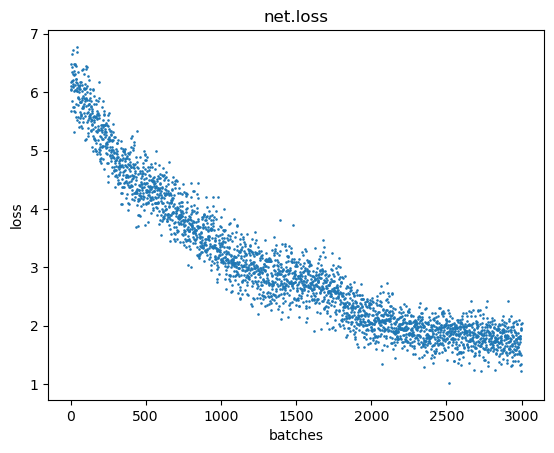

    Correct rate: 11.35%


In [3]:
np.random.seed(2)
plt.title('net.loss')
plt.xlabel('batches')
plt.ylabel('loss')
batch_size = 10
trainset = datasets.MNIST(True, batch_size, True)
testset = datasets.MNIST(False)
ts = np.eye(10)
epoch = 1

net = nndemo_mnist.CNet()
optimizer = optim.MGD(net.parameters(), 0.001, 0.9)

for e in range(epoch):
    net.state = 'train'
    t = time.time()
    for label, data in trainset:
        net.train(data, ts[label])
        optimizer.step()

    print('epoch: {}    use time: {:.3f}s'.format(e + 1, time.time() - t), end='')
    plt.scatter(np.arange(1, len(net.loss) + 1), np.array(net.loss) / batch_size, 3, marker='.')
    plt.show()
    net.loss.clear()
    net.state = 'test'

    c = 0
    for label, data in testset:
        if np.argmax(net(data).tensor) == label:
            c += 1
    print(f'    Correct rate: {c / 100}%')
